# Conceptual questions
We would like to know whether neurons in auditory cortex respond more to natural sounds or synthetic sounds. We record from one neuron at a time and play a sequence of natural and synthetic sounds. We predict that the response to natural sounds will be higher.

* What is the null hypothesis?

> That the response to natural sounds is no different from the response to synthetic sounds.

* What is the alternative hypothesis?

  > That the response to natural sounds is higher than the response to synthetic sounds

* Describe the results and conclusion that would constitute a Type 1 / false positive error.

  > The response to natural sounds is no different than the response to synthetic sounds, but through random variation of the cells we record from, we happen to record a rate during natural sounds that is significantly different than that of synthetic sounds.  As such, we incorrectly conclude natural sounds elicit a stronger response, even though this isn’t true.

* Describe the results and conclusion that would constitute a Type 2 / false negative error.

  > The response to natural sounds is, in fact, higher than the response to synthetic sounds, but through random variation of the cells, we happen to record a firing rate for natural sounds that is sufficiently close to that of synthetic sounds that we cannot reject the hypothesis that there is no difference.  As such, we have failed to find a significant difference where there actually is one.

* Can you think of another type of possible error that is neither Type 1 nor Type 2?

  > There could be error in the instrumentation that we use, or errors in the formulation of hypotheses that we’ve chosen (e.g., maybe we choose the wrong distribution, or maybe we choose the incorrect hypothesis to test in the first place).

* Given that we believed a priori that the response to natural sounds would be higher, should we use a one-tailed or two-tailed statistical test to compare the responses? If you said one-tailed, what would we conclude if the measured response was actually lower for natural sounds? If you said two-tailed, under what circumstances would a one-tailed test be appropriate?

  > We should use a one-tailed test if we only have reason to believe that the response is higher.  That said, it is better to keep it a two-tailed test in general.  If we did run a one-tailed test and got a value that is lower than that for synthetic sounds, we can only fail to reject the null hypothesis, we cannot make statements about significance in the other direction.  In general, we should only use a one-tailed test if it is physically impossible for the signal to be smaller / larger than the null hypothesis

* To keep it simple, first imagine that the response to the natural sound is so much greater than the response to the artificial sound that we pass every possible statistical test with flying colors. May we “reject the null hypothesis” or “accept the alternative hypothesis”? Both? Neither? Why?
  

> Our statistics thus far have only tested the validity of the null hypothesis, so we can only reject the null hypothesis.  This is because we haven’t quantified our uncertainty in the alternative hypothesis at all, only talked about its relationship to the null.

* Now a more realistic scenario. The response to natural sounds is moderately larger than the response to artificial sounds, but we aren’t sure if this is a real effect or just random. A statistical test (t-test or something similar) produces a p-value of 0.01. What does this tell us about the likelihood of our data under the null hypothesis? What about the alternative hypothesis? 

  > The p-value tells us that we have a 1% chance of seeing our data, or data more extreme, if the null hypothesis was true.  It doesn’t say anything about how true the alternative hypothesis is, because we have not specified a specific value for an alternative hypothesis.

##	Give arguments FOR and AGAINST each of the following statements.

* Alpha=0.05 is a meaningful value because 5% is an acceptable level of risk.

  > FOR: 5% is pretty unlikely, so we can be reasonably sure that data we get which resides in this percentage is unlikely enough to reject the null hypothesis.  
  > AGAINST: 5% is unlikely, but not so unlikely that we cannot expect to have type 1 errors.  If our p-values are 5%, then theoretically one in twenty papers has incorrect conclusions.

* Alpha=0.05 is not particularly meaningful except that it is a useful convention making it possible to compare across studies.

  > FOR: true, the community needs to agree on some statistical level for “significance”, so alpha = .05 is a good balance between statistical meaningfulness and practicality.
  
  > AGAINST: alpha=.05 is an important marker because a 1/20 chance is the ideal point beyond which we should reject a hypothesis.  This is because 95% of the data will lie within two standard deviations of the mean, so it makes sense to make this the “cutoff point”  

* Alpha=0.05 is completely arbitrary and therefore hypothesis testing is meaningless. Instead, we should provide point and interval estimates of the effect size. (Nota Bene: A commonly held belief among Bayesians and non-biologists!)

  > FOR: True, .05 only tells us whether a null hypothesis is true, but doesn’t tell us anything about the actual value we’re trying to measure, it just says whether it’s different from a null.  Instead, we should be quantifying our uncertainty in the statistic, not our uncertainty in its deviation from a null.
  
  > AGAINST: False.  While interval estimates are useful, they are just one tool in our toolset.  It may not be perfect, but hypothesis testing is still a useful way of making statements about our data’s relationship to a null hypothesis, and it should still be used.

# Problem sets

1.	Generate two random datasets with the following parameters: N=25, mu1=7, mu2=10, sd1=sd2=5. Plot the histograms of each dataset. Do you think they are significantly different? Run a t-test and report the p-value.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_1samp
%matplotlib inline

In [28]:
### Answer
# The data
# N = 25
N = 75
mu1 = 7
mu2 = 10
sd = 5

# Generate random data
data1 = sd * np.random.randn(N) + mu1
data2 = sd * np.random.randn(N) + mu2

(array([  2.,   0.,   1.,  13.,  10.,  11.,  18.,  11.,   6.,   3.]),
 array([ -6.20268508,  -3.34321962,  -0.48375416,   2.37571129,
          5.23517675,   8.09464221,  10.95410767,  13.81357312,
         16.67303858,  19.53250404,  22.3919695 ]),
 <a list of 10 Patch objects>)

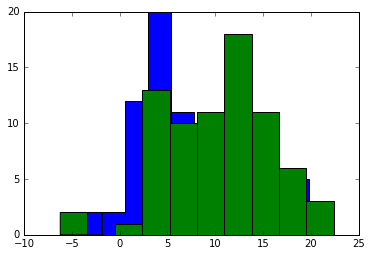

In [29]:
# Histograms
fig, ax = plt.subplots()
ax.hist(data1)
ax.hist(data2)

In [30]:
result = ttest_ind(data1, data2)
print(result.pvalue)

0.00123665214429


2.	Make a bar plot with the mean and standard deviation of each dataset. If you could only look at this bar plot (in a paper figure, for instance), would you be able to tell if the difference was significant? Repeat for standard error. Compare and contrast the information provided by each metric.

In [31]:
# Generate data
mn1 = np.mean(data1)
mn2 = np.mean(data2)

std1 = np.std(data1)
std2 = np.std(data2)

ste1 = std1 / np.sqrt(N)
ste2 = std2 / np.sqrt(N)

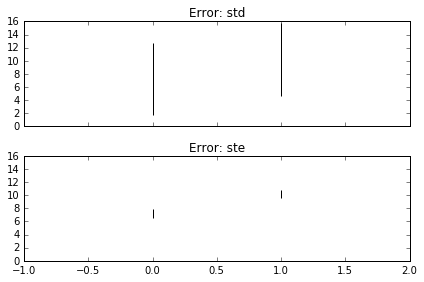

In [32]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
for ax, err1, err2, nm in zip(axs, [std1, ste1], [std2, ste2], ['std', 'ste']):
    ax.vlines([0, 1], [mn1 - err1, mn2 - err2], [mn1 + err1, mn2 + err2])
    _ = plt.setp(ax, xlim=[-1, 2], title='Error: {}'.format(nm))
plt.tight_layout()

3.	Now repeat steps 1 and 2, except this time let N=75 so the statistical power is greater. Which metrics change?
> Basically, the standard deviations remained the same (or even grew), but the standard error and confidence intervals shrank quite a lot.  This is because we reduced our uncertainty in the mean parameter.

# The pitfalls of significance testing
In this problem we will simulate what p-values are obtained in the absence of any real effect. We will simulate data with a mean of 60, and then test the hypothesis that the mean differs from 60.
1.	First guess what the results will be. (No penalty for an incorrect guess.) Will we obtain large p-values (near one)? Small p-values (near zero)?
We’ll obtain large p-values (near one)
2.	Write an R script to generate 500 normal deviates (that is, 500 samples from a normal distribution) with mean 60 and standard deviation 5.
3.	Do a t-test on this data versus a mean of 60. What is the p-value?
4.	Use a loop to repeat steps 2 and 3 one thousand times. What does the distribution of p-values look like?
> They are uniformly distributed between 0 and 1, roughly speaking.  As such, 5% of the values fall below .05.
5.	Does a large p-value mean the null hypothesis is “more true”? Does a small p-value mean that it is “less true”? 
> Larger p-values meant that the sample mean had a larger deviation from 60.  However, this didn’t have anything to do with the null distribution being more or less true.

In [33]:
# The data
N = 500
mu = 60
sd = 5

N_tests = 1000
pvalues = np.zeros(N_tests)

In [35]:
for ii in range(N_tests):
    # Generate random data
    data = sd * np.random.randn(N) + mu    

    # Test vs 60
    ttest_res = ttest_1samp(data, mu)

    # Store p-value
    pvalues[ii] = ttest_res.pvalue

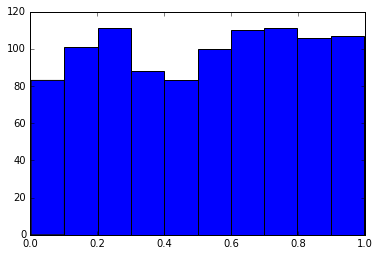

In [38]:
# Show the distribution of p-values
fig, ax = plt.subplots()
_ = ax.hist(pvalues)

In this problem we will construct a confidence interval and hypothesis acceptance region of the data in the first problem.

1.	Similar to problem 1, generate a dataset of 500 normal deviates with mean 60 and standard deviation 5. What is the sample mean? Is this a point estimate or an interval estimate?
> Point estimate.
2.	Calculate a 95% confidence interval on the population mean by bootstrapping. Construct 1000 surrogate datasets by drawing with replacement from the data. Calculate the mean of each surrogate dataset. Plot a histogram of the surrogate means. How does the mean and spread of this histogram compare to the histogram in part 1? Why?
> It is much tighter than the distribution of the data itself, this is because there is less variability in the mean of the distribution.
3.	Calculate an interval that contains 95% of the surrogate means. Does this contain the true mean? Run the script over and over again. Does it always contain the true mean? How often would we expect it to contain the true mean? Why?
> It does seem to cover the true mean each time, which is a bit strange.  It seems like it should only cover the mean 5% of the time…
4.	BONUS QUESTION: Calculate the acceptance region of this hypothesis: “the population mean is test_mu”. Do this by looping over 1000 test_mu points in the range (58,62) and testing your original dataset against each value of test_mu in this range. For what values of test_mu is the obtained p-value less than 0.05? This range should be close to equal to the confidence interval you obtained in part 3. Why?
> This is because when we calculate a confidence interval, we are 95% certain that the true mean is in this interval.  When we calculate the t-test p-values, we choose cutoff points so that these points fall in the remaining 5% on the tails of the distribution.  Since in this simulation, the true mean is 60, then to our 95% confidence intervals should be centered around this mean.  Those intervals also correspond to roughly 95% of the probability mass of the normal distribution, which means they’re also cutoff points for p-values.

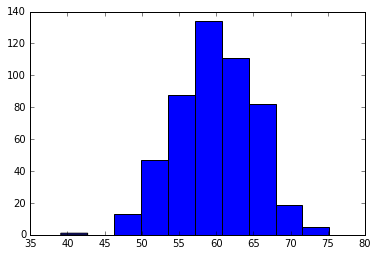

In [40]:
# The data
N = 500
mu = 60
sd = 5

# Bootstrap parameters
N_boots = 1000

# Generate random data
data = sd * np.random.randn(N) + mu

# Plot the data
fig, ax = plt.subplots()
_ = ax.hist(data)

In [42]:
# Bootstrap the mean
bootstrap_means = np.zeros(N_boots)
for ii in range(N_boots):
    draw = np.random.choice(data, N)
    bootstrap_means[ii] = np.mean(draw)

In [44]:
# Percentiles of the bootstrapped means
CI = np.percentile(bootstrap_means, [2.5, 97.5])
print(CI)

[ 59.43203294  60.37723858]


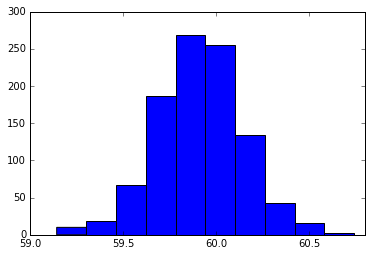

In [46]:
# Plot the bootstrapped means
fig, ax = plt.subplots()
_ = ax.hist(bootstrap_means)

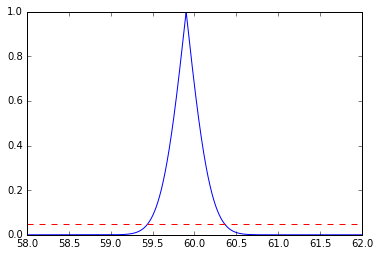

In [58]:
# Test
test_mu = np.linspace(58, 62, 1000)
test_pval = np.zeros(len(test_mu))
for ii, imu in enumerate(test_mu):
    ttest_res = ttest_1samp(data, imu)
    test_pval[ii] = ttest_res.pvalue

# Plot acceptance region
fig, ax = plt.subplots()
ax.plot(test_mu, test_pval)
ax.axhline(.05, c='r', ls='--')